In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/home/aritra/Downloads/Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


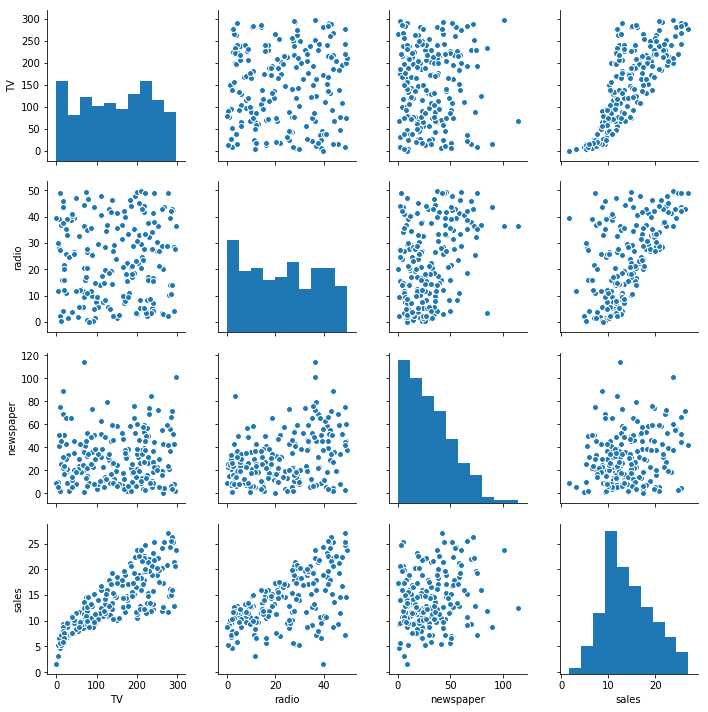

In [26]:
sns.pairplot(data.iloc[:,1:])

###### We can see the sales have the good amount of correlation with the TV and the radio and it have the least with the newspaper.

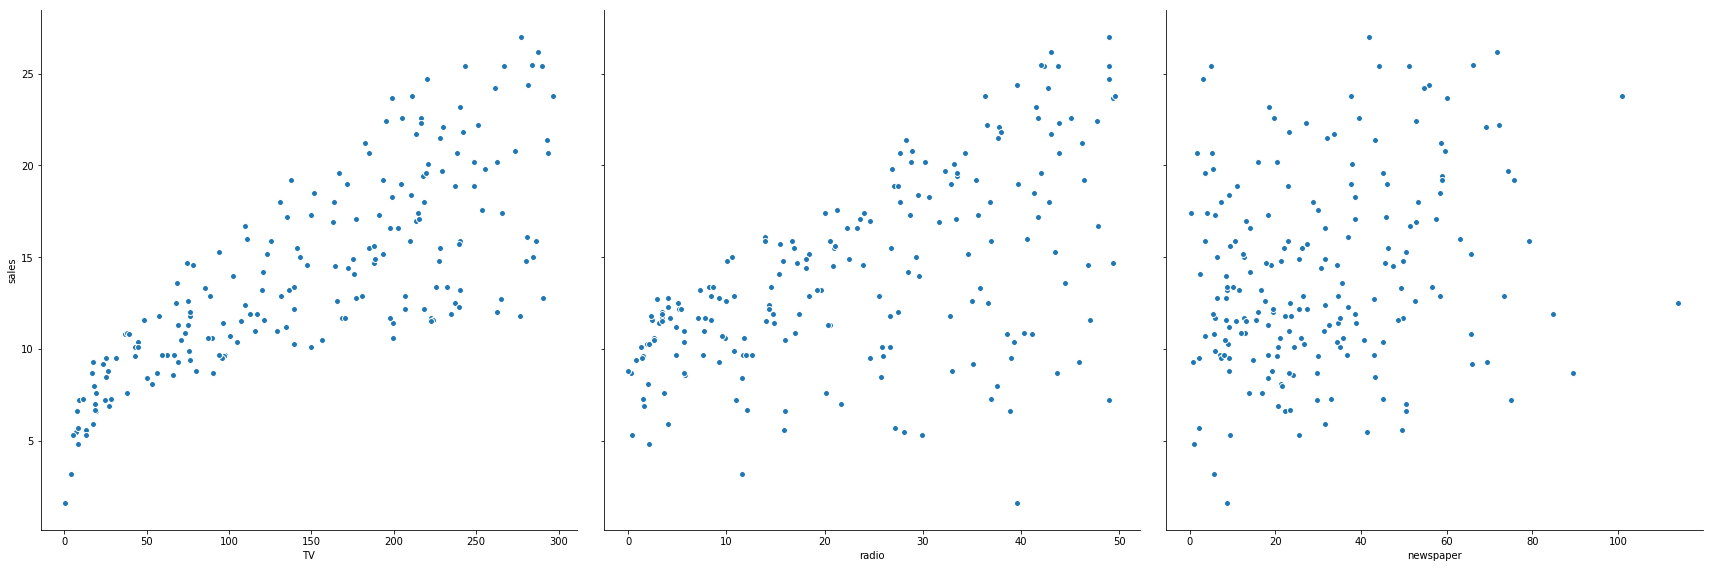

In [30]:
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars=['sales'],size=8)

In [10]:
x=data[['TV','radio','newspaper']]

In [31]:
y=data['sales']

Splitting and Training the model with the help of sklearn.

In [32]:
from sklearn.cross_validation import train_test_split

/home/aritra/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [36]:
len(x_test)

60

Importing linear Regression model and instantiating it

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lm=LinearRegression()

In [39]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
print(lm.intercept_)

2.6527896688794943


In [42]:
print(lm.coef_)

[0.0454256  0.18975773 0.00460308]


creating a data frame out of the coefficients

In [44]:
coeff_df=pd.DataFrame(lm.coef_,x_test.columns,columns=['coeffs'])

In [45]:
coeff_df

,coeffs
TV,0.045426
radio,0.189758
newspaper,0.004603


predicting with the help of library

In [47]:
y_predict=lm.predict(x_test)

In [59]:
c=[val for val in np.linspace(1,50,60)]

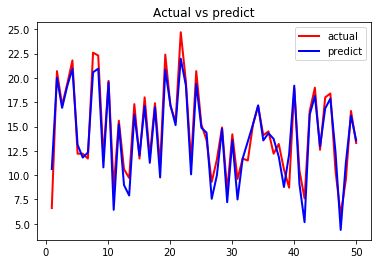

In [64]:
plt.plot(c,y_test,color='r',linewidth=2)
plt.plot(c,y_predict,color='b',linewidth=2)
plt.title('Actual vs predict')
plt.legend(['actual','predict'])

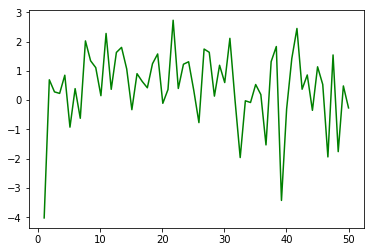

In [65]:
plt.plot(c,y_test-y_predict,color='g')

In [68]:
from sklearn.metrics import r2_score
rval=r2_score(y_test,y_predict)

In [69]:
rval

0.9058622107532245

### optional step:checking of p-value using statsmodels.api

In [73]:
import statsmodels.api as sm
x_train_new=x_train
# the eq.n Y=B0+X1.B1 rewritten as Y=B0.X0+X1.B1 where X0=1 this constant 1 is not added automatically.So,
# in case of ols model the value of the constant is not added automatically so it needs to be explicitly added by the following statement.
x_train_new=sm.add_constant(x_train_new)
#fitting in the model by passing the new x_train .
lg1=sm.OLS(y_train,x_train_new).fit()
#printing coeffs
lg1.params


const        2.652790
TV           0.045426
radio        0.189758
newspaper    0.004603
dtype: float64

In [75]:
print(lg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           9.97e-66
Time:                        11:30:53   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

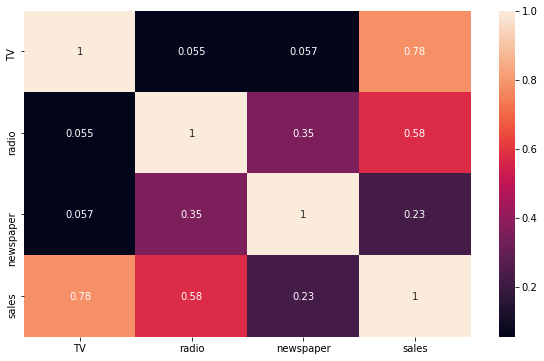

In [95]:
plt.figure(figsize=(10,6))
sns.heatmap(data.iloc[:,1:].corr(),annot=True)

##### We found out that the newspaper has the least contribution towards the response variable sales.So we drop it. and agin performing
Linear Regression

In [102]:
x_train_new1=x_train[['TV','radio']]
x_test_new1=x_test[['TV','radio']]

In [103]:
y_train_new1=y_train
y_test_new1=y_test

In [104]:
lg_new=LinearRegression()
lg_new.fit(x_train_new1,y_train_new1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
lg_new.intercept_

2.7190400406029234

In [111]:
coeff_df_new=pd.DataFrame(lg_new.coef_,x_train_new1.columns,columns=['coefficient new'])

In [112]:
coeff_df_new

,coefficient new
TV,0.045533
radio,0.192488


In [120]:
y_predict_new1=lg_new.predict(x_test_new1)

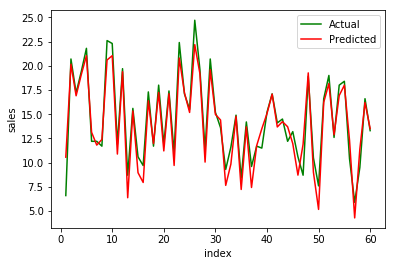

In [125]:
#plotting
c=[val for val in range (1,61,1)]
plt.plot(c,y_test_new1,color='g')
plt.plot(c,y_predict_new1,color='r')
plt.legend(['Actual','Predicted'])
plt.xlabel('index')
plt.ylabel('sales')
plt.show()

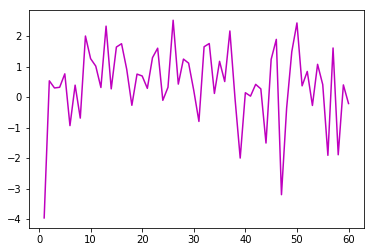

In [123]:
plt.plot(c,(y_test_new1-y_predict_new1),color='m')

In [129]:
#rscore and mse now
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test_new1,y_predict_new)
rvalue_new=r2_score(y_test_new1,y_predict_new)
print(mse,rvalue_new)

1.784740052090281 0.909216449171822


In [132]:
#calculating again using statsmodels

x_train_final=x_train_new
x_train_final=sm.add_constant(x_train_final)
lm_final=sm.OLS(y_train_new1,x_train_new1).fit()

In [134]:
lm_final.params

TV       0.053510
radio    0.238937
dtype: float64

In [136]:
print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     3310.
Date:                Sat, 26 Jan 2019   Prob (F-statistic):          2.48e-117
Time:                        20:45:55   Log-Likelihood:                -304.52
No. Observations:                 140   AIC:                             613.0
Df Residuals:                     138   BIC:                             618.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0535      0.001     35.857      0.0